In [6]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [7]:
# Import the data
df = pd.read_csv(r'C:\Users\Lindsay\Github\MEA_data\Before Hypoxia Plate 4(001)(000)_spike_counts.csv')

In [8]:
# Deleting empty columns
df = df.dropna(axis=1, how='all')

# deleting the unnamed column
df = df.drop('Unnamed: 2', axis=1)

df.head()

,Interval Start (S),Interval End (S),A1,A1_11,A1_12,A1_13,A1_14,A1_15,A1_16,A1_17,...,A1_77,A1_78,A1_81,A1_82,A1_83,A1_84,A1_85,A1_86,A1_87,A1_88
0,00000.000000,00001.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00001.000000,00002.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00002.000000,00003.000000,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00003.000000,00004.000000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00004.000000,00005.000000,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The highlighted text is a line of Python code that uses the `dropna` method from the pandas library to remove columns from a DataFrame (`df`) that contain only `NaN` (Not a Number) values.

Explanation:
`df.dropna(axis=1, how='all')`:
`df`: The DataFrame from which columns are being removed.
`dropna`: A method to remove missing values.
`axis=1`: Specifies that the operation should be performed on columns (if `axis=0`, it would operate on rows).
`how='all'`: Specifies that only columns where all values are NaN should be removed.

In [9]:
# Check the data types
print('Before converting the data types:')
print("Data type of 'Interval Start (S)':", type(df['Interval Start (S)'][0]))
print("Data type of 'Interval End (S)':", type(df['Interval End (S)'][0]))
print("Data type of 'A1_11':", type(df['A1_11'][0]))

# Python is seeing the intervals as strings instead of floats

Before converting the data types:
Data type of 'Interval Start (S)': <class 'str'>
Data type of 'Interval End (S)': <class 'str'>
Data type of 'A1_11': <class 'numpy.float64'>


In [10]:
# Convert the columns to numeric types
df['Interval Start (S)'] = pd.to_numeric(df['Interval Start (S)'], errors='coerce')
df['Interval End (S)'] = pd.to_numeric(df['Interval End (S)'], errors='coerce')

# Ensure the values are numerical
interval_start = df['Interval Start (S)'].iloc[0]
interval_end = df['Interval End (S)'].iloc[0]

# Check the data types
print("Data type of 'Interval Start (S)':", interval_start, type(interval_start))
print("Data type of 'Interval End (S)':", interval_end, type(interval_end))

Data type of 'Interval Start (S)': 0.0 <class 'numpy.float64'>
Data type of 'Interval End (S)': 1.0 <class 'numpy.float64'>


The +1 is added to the `interval_end.max()` to ensure that the last interval end is included in the range of time bins. This is because np.arange generates values in the half-open interval `[start, stop)`, meaning it includes the start value but excludes the stop value. By adding `+1` to `interval_end.max()`, you ensure that the last interval end is included in the time bins.

In [11]:
# Define the bin width (e.g., 1 s)
bin_width = 1.0

# Columns to process
columns_to_process = df.columns[3:].tolist()

print(columns_to_process)

# Initialize a dictionary to accumulate spike counts for each column
spike_counts = {col: {} for col in columns_to_process}


['A1_11', 'A1_12', 'A1_13', 'A1_14', 'A1_15', 'A1_16', 'A1_17', 'A1_18', 'A1_21', 'A1_22', 'A1_23', 'A1_24', 'A1_25', 'A1_26', 'A1_27', 'A1_28', 'A1_31', 'A1_32', 'A1_33', 'A1_34', 'A1_35', 'A1_36', 'A1_37', 'A1_38', 'A1_41', 'A1_42', 'A1_43', 'A1_44', 'A1_45', 'A1_46', 'A1_47', 'A1_48', 'A1_51', 'A1_52', 'A1_53', 'A1_54', 'A1_55', 'A1_56', 'A1_57', 'A1_58', 'A1_61', 'A1_62', 'A1_63', 'A1_64', 'A1_65', 'A1_66', 'A1_67', 'A1_68', 'A1_71', 'A1_72', 'A1_73', 'A1_74', 'A1_75', 'A1_76', 'A1_77', 'A1_78', 'A1_81', 'A1_82', 'A1_83', 'A1_84', 'A1_85', 'A1_86', 'A1_87', 'A1_88']


In [12]:
# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    interval_start = row['Interval Start (S)']
    interval_end = row['Interval End (S)']
    
    for col in columns_to_process:
        spike_count = row[col]
        
        # Define the time bins for the current interval
        try:
            time_bins = np.arange(interval_start, interval_end + bin_width, bin_width)
        except ValueError as e:
            continue
        
        # Accumulate spike counts in the bins
        for bin_start in time_bins[:-1]:
            if bin_start not in spike_counts[col]:
                spike_counts[col][bin_start] = 0
            spike_counts[col][bin_start] += spike_count

# Convert the dictionaries to sorted lists of bins and counts
sorted_bins = {col: sorted(spike_counts[col].keys()) for col in columns_to_process}
sorted_counts = {col: [spike_counts[col][bin_start] for bin_start in sorted_bins[col]] for col in columns_to_process}

In [13]:
# Determine the number of columns to process
num_columns = len(columns_to_process)

# Calculate the number of rows and columns for the subplot grid
num_cols = math.ceil(math.sqrt(num_columns))  # Number of columns in the grid
num_rows = math.ceil(num_columns / num_cols)  # Calculate the number of rows needed

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 8
Number of columns: 64


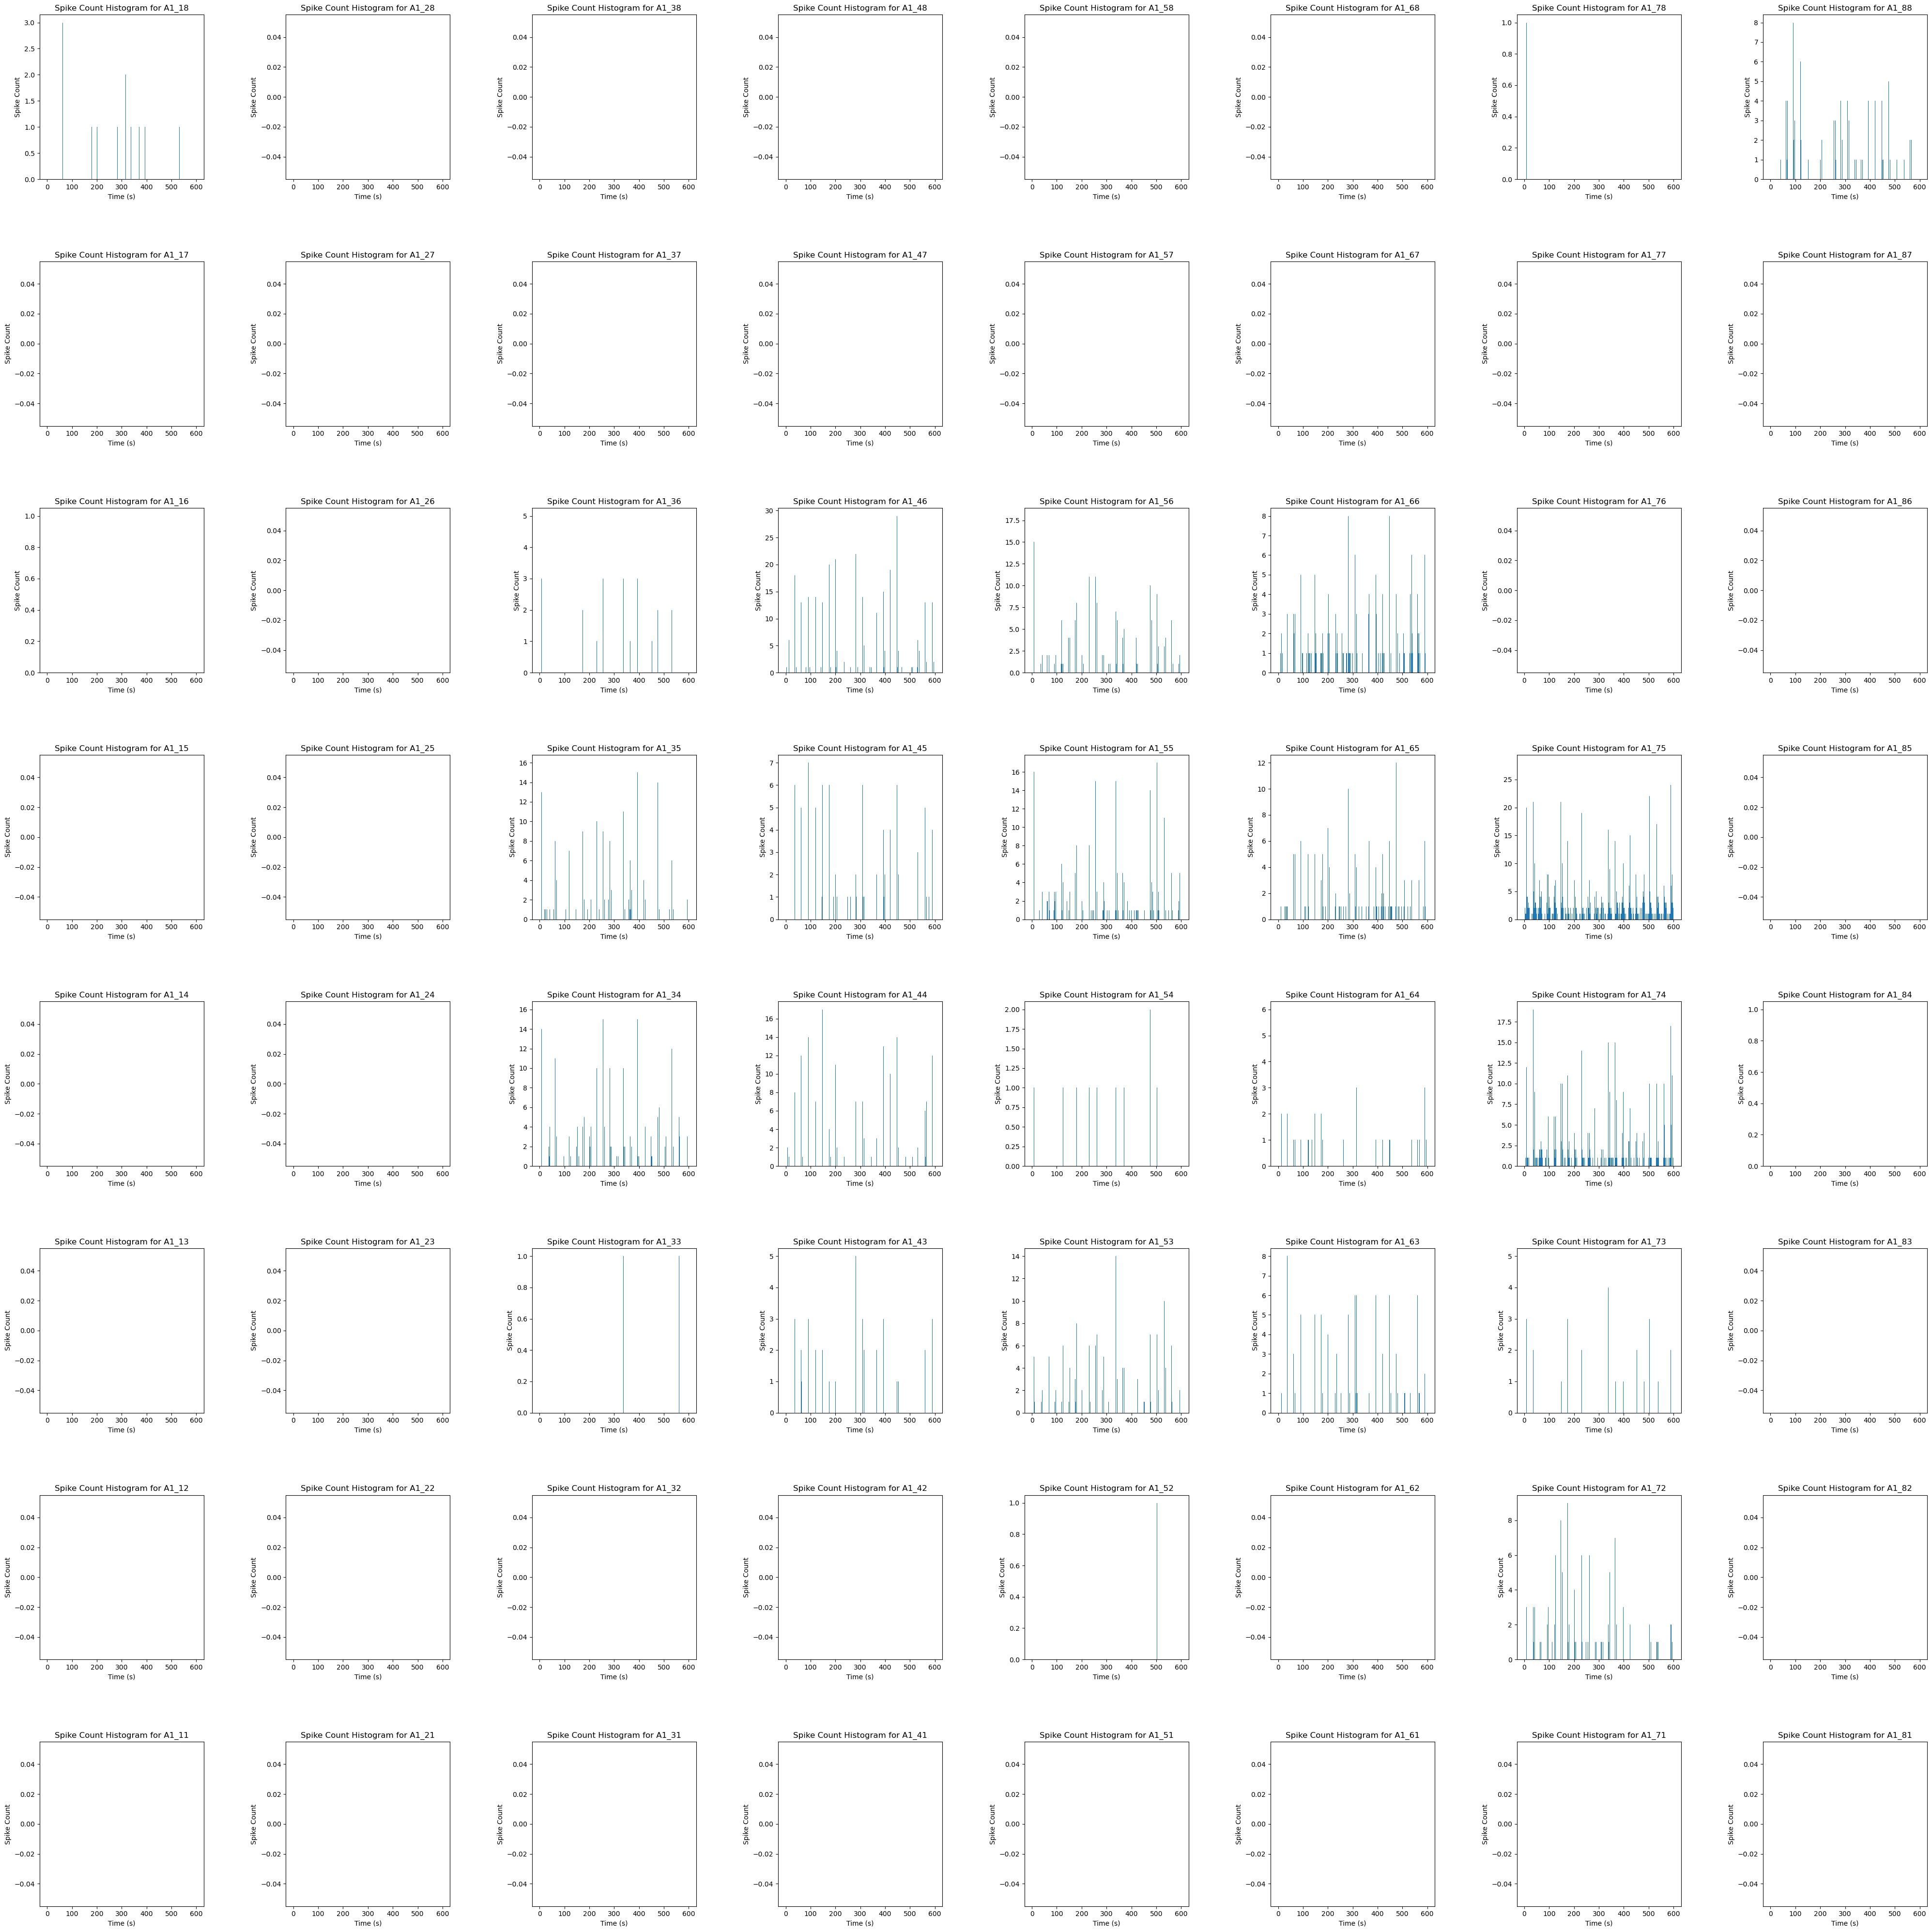

In [19]:
# Create a figure and an array of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))

# Ensure axs is always an array
if not isinstance(axs, np.ndarray):
    axs = np.array([axs])

# Flatten the array of subplots for easy iteration
axs = axs.flatten()

# Loop through each column to process
for index, col in enumerate(columns_to_process, 0):  # had to make this 0 bc it's usually 1
    # Calculate the row and column index for the subplot
    row_idx = num_rows - 1 - (index % num_rows)  # Reverse the row index
    col_idx = index // num_rows

    # Calculate the subplot index
    subplot_index = row_idx * num_cols + col_idx
    
    # Create a subplot for each column
    ax = axs[subplot_index]
    ax.bar(sorted_bins[col], sorted_counts[col], width=bin_width, align='edge')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Spike Count')
    ax.set_title(f'Spike Count Histogram for {col}')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Fine-tune the spacing
plt.show()

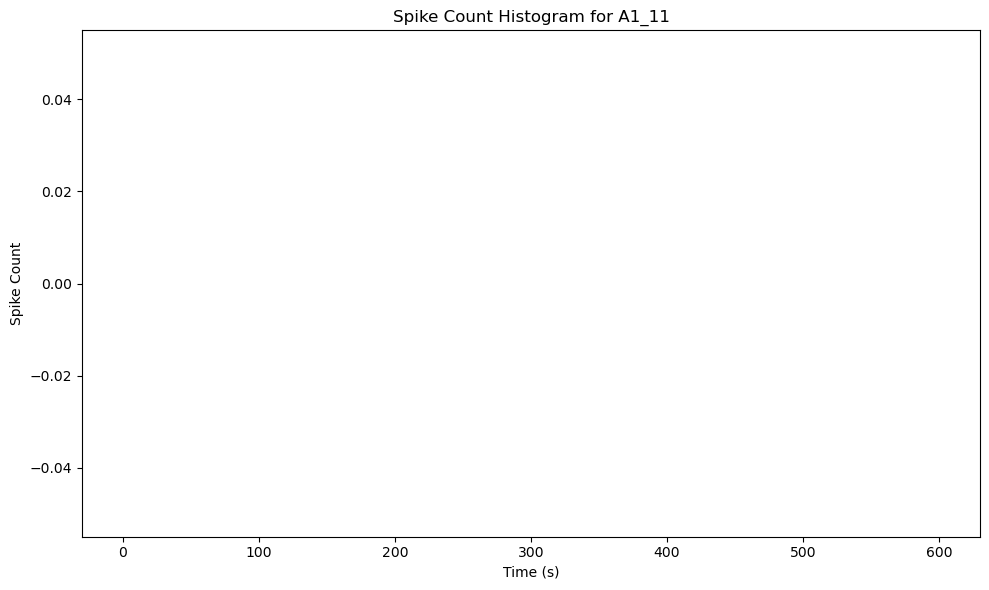

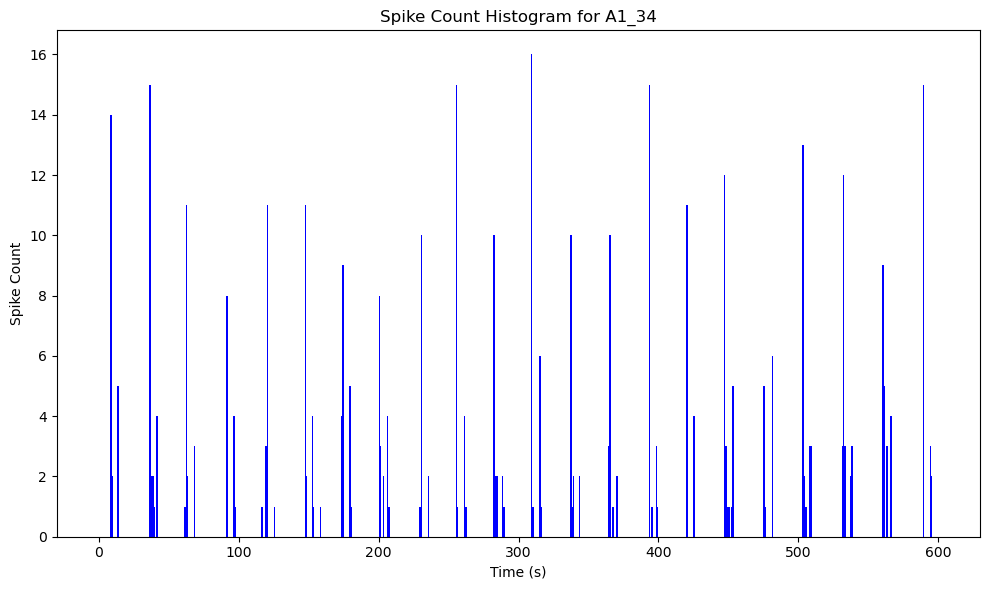

In [22]:
# Define the column names you want to plot
channels_to_plot = ['A1_11', 'A1_34']

# Check if the desired columns exist and plot them
for col in channels_to_plot:
    if col in sorted_bins and col in sorted_counts:
        # Extract the data for the column
        bins = sorted_bins[col]
        counts = sorted_counts[col]

        # Create a new figure and axis for the column
        fig, ax = plt.subplots(figsize=(10, 6))

        # Plot the data
        ax.bar(bins, counts, width=bin_width, align='edge', color='blue')
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Spike Count')
        ax.set_title(f'Spike Count Histogram for {col}')

        # Adjust layout to prevent overlap
        plt.tight_layout()
        plt.show()
    else:
        print(f"The column {col} does not exist in the data.")